In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# allen institute mouse atlas 25 um reference CSV
allen_df = pd.read_csv(r'structure_tree_safe_2017.csv')
# function to read outputs from NeuroInfo
# data has 2 different possible formats depending on brain, this function accounts for these differences in data format by checking first column name
def read_points_csv(csv):
    points_df = pd.read_csv(csv, header=None)
    columns = points_df.iloc[1]
    points_df.drop([0, 1], inplace=True)
    points_df.columns = columns
    points_df.reset_index(drop=True, inplace=True)
    if points_df.columns[0] == 'name':
        points_df['total count'] = points_df['count'].astype(int).sum(axis=1)
        count_df = points_df.loc[:, ['name', 'acronym', 'total count']]
        acronym_dict = {}
        name_dict = {}
        for idx in range(len(count_df)):
            next_acronym = count_df.iloc[idx]['acronym']
            if next_acronym in acronym_dict.keys():
                acronym_dict[next_acronym] += count_df.iloc[idx]['total count']
                name_dict[count_df.iloc[idx]['name']] += count_df.iloc[idx]['total count']
            else:
                acronym_dict[next_acronym] = count_df.iloc[idx]['total count']
                name_dict[count_df.iloc[idx]['name']] = count_df.iloc[idx]['total count']
        cell_count_acronym_dict = acronym_dict
        cell_count_name_dict = name_dict
    else:
        cell_count_acronym_dict = dict(points_df.value_counts('acronym'))
        cell_count_name_dict = dict(points_df.value_counts('name'))
    return cell_count_acronym_dict, cell_count_name_dict

In [34]:
#def read_points_csv(csv_file):
csv = r"C:\Users\matte\Desktop\SliceData\nelson_brains\2020_points.csv"

def read_points_csv(csv):
    points_df = pd.read_csv(csv, header=None)
    columns = points_df.iloc[1]
    points_df.drop([0, 1], inplace=True)
    points_df.columns = columns
    points_df.reset_index(drop=True, inplace=True)
    if points_df.columns[0] == 'name':
        points_df['total count'] = points_df['count'].astype(int).sum(axis=1)
        count_df = points_df.loc[:, ['name', 'acronym', 'total count']]
        acronym_dict = {}
        name_dict = {}
        for idx in range(len(count_df)):
            next_acronym = count_df.iloc[idx]['acronym']
            if next_acronym in acronym_dict.keys():
                acronym_dict[next_acronym] += count_df.iloc[idx]['total count']
                name_dict[count_df.iloc[idx]['name']] += count_df.iloc[idx]['total count']
            else:
                acronym_dict[next_acronym] = count_df.iloc[idx]['total count']
                name_dict[count_df.iloc[idx]['name']] = count_df.iloc[idx]['total count']
        cell_count_acronym_dict = acronym_dict
        cell_count_name_dict = name_dict
    else:
        cell_count_acronym_dict = dict(points_df.value_counts('acronym'))
        cell_count_name_dict = dict(points_df.value_counts('name'))
    return cell_count_acronym_dict, cell_count_name_dict

type(read_points_csv(csv)[0].items())

dict_items

In [46]:
import os
points_csvs_folder = r"C:\Users\matte\Desktop\SliceData\nelson_brains"

def get_combined_data(folder):
    acronym_dict_combined = {}
    name_dict_combined = {}
    for csv_file in os.listdir(folder):
        csv = os.path.join(folder, csv_file)
        count_acronym_dict, count_name_dict = read_points_csv(csv)
        for key, val in count_acronym_dict.items():
            if key in acronym_dict_combined.keys():
                acronym_dict_combined[key] += val
            else:
                acronym_dict_combined[key] = val
        for key, val in count_name_dict.items():
            if key in name_dict_combined.keys():
                name_dict_combined[key] += val
            else:
                name_dict_combined[key] = val
    return acronym_dict_combined, name_dict_combined

def get_combined_visual_count(folder):
    name_dict_combined = {}
    for csv_file in os.listdir(folder):
        csv = os.path.join(folder, csv_file)
        count_acronym_dict, count_name_dict = read_points_csv(csv)
        for key, val in count_name_dict.items():
            if 'visual' in key:
                if key in name_dict_combined.keys():
                    name_dict_combined[key] += val
                else:
                    name_dict_combined[key] = val
    return name_dict_combined

acronym_count_combined, name_count_combined = get_combined_data(points_csvs_folder)

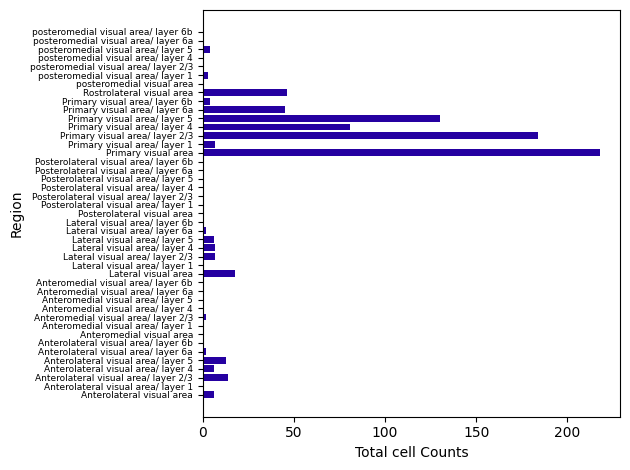

In [48]:
visual_dict = get_combined_visual_count(points_csvs_folder)
visual_dict = dict(sorted(visual_dict.items()))
plt.barh(list(visual_dict.keys()), list(visual_dict.values()), color='#2500a1')
plt.yticks(fontsize = 6.5)
plt.xlabel('Total cell Counts')
plt.ylabel('Region')
plt.tight_layout()

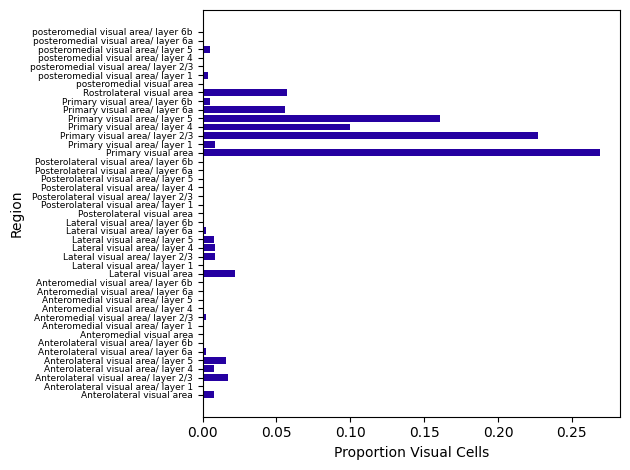

In [37]:
num_visual_cells = sum(visual_dict.values())
plt.barh(list(visual_dict.keys()), list(np.array(list(visual_dict.values())) / num_visual_cells), color='#2500a1')
plt.yticks(fontsize = 6.5)
plt.xlabel('Proportion Visual Cells')
plt.ylabel('Region')
plt.tight_layout()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


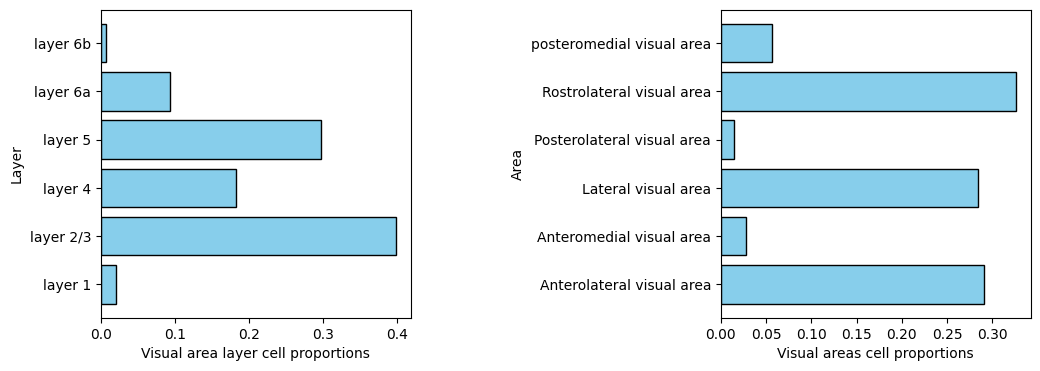

In [ ]:
num_visual_cells = sum(visual_dict.values())
visual_layers = {'layer 1':0, 'layer 2/3':0, 'layer 4':0, 'layer 5':0, 'layer 6a':0, 'layer 6b':0}
visual_areas = {'Anterolateral visual area':0, 'Anteromedial visual area':0, 'Lateral visual area':0, 'Posterolateral visual area':0,
                 'Rostrolateral visual area':0, 'posteromedial visual area':0}
primary_visual_layers = {}
for key, val in visual_dict.items():
    for area in visual_areas.keys():
        if area in key:
            visual_areas[area] += val
    for layer in visual_layers.keys():
        if layer in key:
            visual_layers[layer] += val
            if 'Primary' in key:
                if key in primary_visual_layers:
                    primary_visual_layers[key] += val
                else:
                    primary_visual_layers[key] = val


layers, counts = list(visual_layers.keys()), list(np.array(list(visual_layers.values())) / int(sum(visual_layers.values())))
areas, area_counts = list(visual_areas.keys()), list(np.array(list(visual_areas.values())) / int(sum(visual_areas.values())))
primary_layers, primary_counts = list(primary_visual_layers.keys()), list(np.array(list(primary_visual_layers.values())) / int(sum(primary_visual_layers.values())))
layers_totals, layers_totals_counts = list(visual_layers.keys()), list(np.array(list(visual_layers.values())))
# lower_errors = np.array([[(val - ((val * 0.95) - val)) 
#errors = np.array([[(val - ((val * 0.95))), (val + (val * 0.5))] for val in counts]).T
errors = [np.std(count) / np.sqrt(np.size(count)) for count in counts]
print(errors)
#standard_errors = np.sqrt((counts * (1 - counts)) / sample_size)
# ci_lower = counts - 1.96 * standard_errors
# ci_upper = counts + 1.96 * standard_errors
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Combine lower and upper error into a 2D array for `xerr`
#errors = np.array([ci_lower, ci_upper])
axs[0].barh(layers, counts, capsize=5, color='skyblue', edgecolor='black')
#axs[0].set_yticks(fontsize = 6.5)
axs[0].set_xlabel('Visual area layer cell proportions')
axs[0].set_ylabel('Layer')
axs[1].barh(areas, area_counts, capsize=5, color='skyblue', edgecolor='black')
#axs[1].set_yticks(fontsize = 6.5)
axs[1].set_xlabel('Visual areas cell proportions')
axs[1].set_ylabel('Area')
plt.tight_layout
plt.subplots_adjust(wspace=1)
plt.show()

Text(0, 0.5, 'Layer')

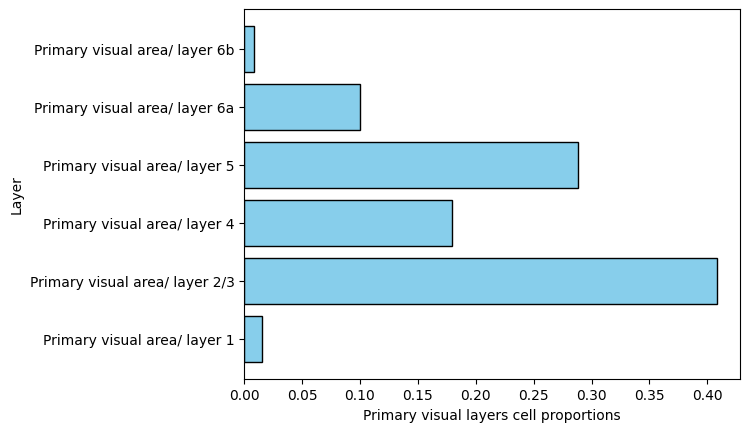

In [39]:
plt.barh(primary_layers, primary_counts, capsize=5, color='skyblue', edgecolor='black')
#axs[1].set_yticks(fontsize = 6.5)
plt.xlabel('Primary visual layers cell proportions')
plt.ylabel('Layer')

Text(0, 0.5, 'Layer')

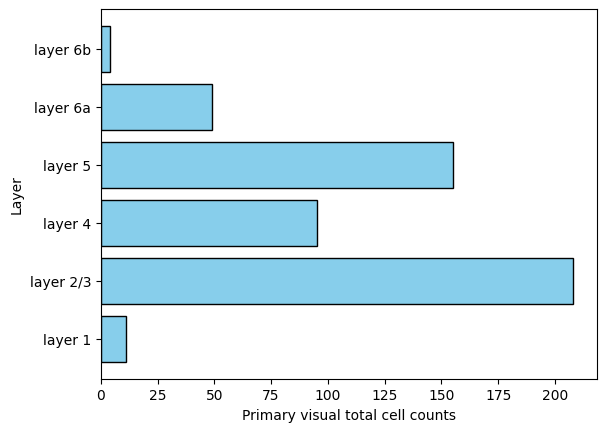

In [40]:
plt.barh(layers_totals, layers_totals_counts, capsize=5, color='skyblue', edgecolor='black')
#axs[1].set_yticks(fontsize = 6.5)
plt.xlabel('Primary visual total cell counts')
plt.ylabel('Layer')

In [42]:
# create dataframe from acronym cell counts dictionary
cell_totals_df = pd.DataFrame(acronym_count_combined.items(), columns=['acronym', 'cell_count'])
# add region name column to acronym counts dataframe
cell_totals_df['region name'] = pd.Series([name.lower() for name in name_count_combined.keys()])

In [ ]:
test_vals = {}
test_vals['TH'] = sum(cell_totals_df[cell_totals_df['region name'].str.contains('thalamus')]['cell_count'])
test_vals['VIS'] = sum(cell_totals_df[cell_totals_df['region name'].str.contains('visual')]['cell_count'])
test_vals['AUD'] = sum(cell_totals_df[cell_totals_df['region name'].str.contains('auditory')]['cell_count'])
test_vals['MO'] = sum(cell_totals_df[cell_totals_df['region name'].str.contains('motor')]['cell_count'])
test_vals['SS'] = sum(cell_totals_df[cell_totals_df['region name'].str.contains('somatosensory')]['cell_count'])

In [61]:
visual_df

,acronym,cell_count,region name
113,VIS,242,visual areas
114,VISal,6,anterolateral visual area
115,VISal1,0,anterolateral visual area/ layer 1
116,VISal2/3,14,anterolateral visual area/ layer 2/3
117,VISal4,6,anterolateral visual area/ layer 4
118,VISal5,13,anterolateral visual area/ layer 5
119,VISal6a,2,anterolateral visual area/ layer 6a
120,VISal6b,0,anterolateral visual area/ layer 6b
121,VISam,0,anteromedial visual area
122,VISam1,1,anteromedial visual area/ layer 1


In [81]:
visual_df = cell_totals_df[cell_totals_df['region name'].str.contains('visual')]

major_vis_areas = visual_df[~visual_df['region name'].str.contains('layer')]

In [ ]:
total_visual_cells = major_vis_areas['cell_count'].sum()
max_cells = max(major_vis_areas['cell_count']) 
major_visual_areas_dict = dict(zip(major_vis_areas['acronym'], major_vis_areas['cell_count'] / max_cells))

,acronym,cell_count,region name
113,VIS,242,visual areas
114,VISal,6,anterolateral visual area
121,VISam,0,anteromedial visual area
128,VISl,18,lateral visual area
135,VISp,218,primary visual area
142,VISpl,0,posterolateral visual area
149,VISpm,0,posteromedial visual area
261,VISrl,46,rostrolateral visual area


In [86]:
regex = '\d|layer'
major_areas_df = cell_totals_df[~cell_totals_df['region name'].str.contains(regex, case=False, na=False)]
total_cells = major_areas_df['cell_count'].sum()
major_area_props = dict(zip(major_areas_df['acronym'], major_areas_df['cell_count'] / max(major_areas_df['cell_count'])))
less_letters_df = cell_totals_df[cell_totals_df['acronym'].str.len() < 4]
less_letters_dict = dict(zip(less_letters_df['acronym'], less_letters_df['cell_count'] / max(less_letters_df['cell_count'])))

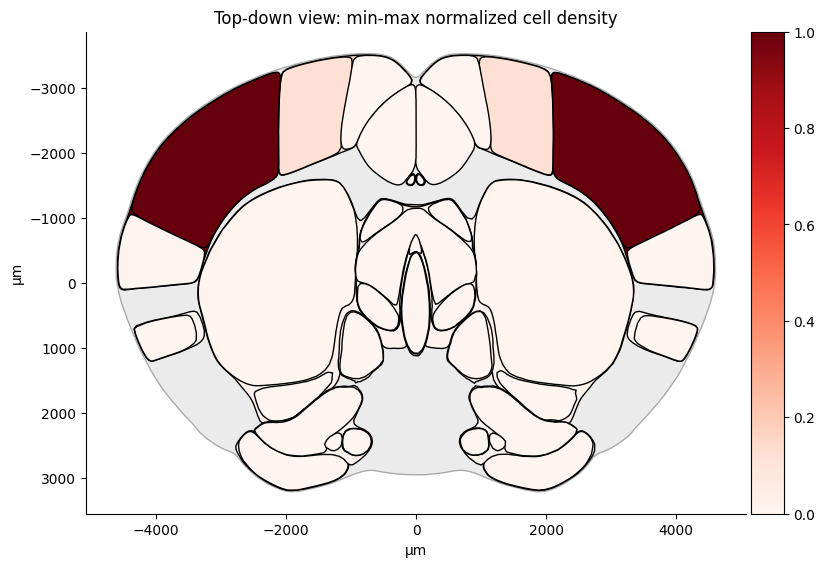

In [92]:
import brainglobe_heatmap as bgh

f = bgh.Heatmap(
    less_letters_dict,
    # when using a named orientation, you can pass a single value!
    position=5000,
    # 'frontal' or 'sagittal,' or 'horizontal' or a tuple (x,y,z)
    orientation="frontal",
    title="Top-down view: min-max normalized cell density",
    atlas_name='allen_mouse_25um',
    format="2D", 
    thickness=2500
).show()

In [ ]:
import nibabel as nib
import pyvista as pv
import matplotlib.pyplot as plt

nrrd_data = nib.load(r"C:\Users\matte\Downloads\ara_nissl_100.nrrd")
# Extract the 3D numpy array from the NRRD file
image_data = nrrd_data.get_fdata()

# Check the shape of the data (it should be 3D)
print("Data shape:", image_data.shape)

# Create a pyvista grid from the numpy array
volume = pv.wrap(image_data)

# Optionally, you can rescale the volume for better visibility
volume = volume.interpolate()

# Set up the plotter
plotter = pv.Plotter()

# Add the volume to the plotter
plotter.add_volume(volume, cmap="bone")  # You can use different colormaps like 'bone', 'coolwarm', etc.

# Show the plot
plotter.show()

ImageFileError: Cannot work out file type of "C:/Users/matte/Downloads/ara_nissl_100.nrrd"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.core.reference_space import ReferenceSpace

# Load Brain Observatory Cache (make sure to provide the correct manifest file)
boc = BrainObservatoryCache(manifest_file='manifest.json')  # Provide the correct path to the manifest

# Fetch structure information from the Brain Observatory Cache
# This will return the structure tree with the names and IDs of brain regions
structure_tree = boc.get_ontology()
# Load the reference space
reference_space = ReferenceSpace(structure_tree)
# Example: Select a few regions to annotate by name (you can also select by ID)
selected_regions = ["Motor cortex", "Somatosensory cortex", "Hippocampus"]

# Color map for visualizing regions
region_colors = {
    "Motor cortex": "red",
    "Somatosensory cortex": "blue",
    "Hippocampus": "green"
}
# Create a plot to visualize
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate through the selected regions and plot them
for region_name in selected_regions:
    # Find the structure ID by name from the structure tree
    structure_id = structure_tree.get_structure_by_name(region_name).id
    
    # Get the 2D coordinates (you can use 3D coordinates for more advanced visualizations)
    structure_coords = reference_space.get_structure_coordinates(structure_id)
    
    # Plot these coordinates
    coords = np.array(structure_coords)
    ax.scatter(coords[:, 0], coords[:, 1], color=region_colors.get(region_name, 'gray'), label=region_name)

# Add title and labels to the plot
ax.set_title("Annotated Mouse Brain with Selected Regions Colored")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.legend()
# Display the plot
plt.show()

AttributeError: 'BrainObservatoryCache' object has no attribute 'get_ontology'

In [ ]:
from brainglobe_atlasapi import BrainGlobeAtlas
import brainglobe_heatmap as bgh
bg_atlas = BrainGlobeAtlas("allen_mouse_25um", check_latest=True)
min_count, max_count = min(acronym_count_combined.values()), max(acronym_count_combined.values()) 
sum_vals = sum(acronym_count_combined.values())
heatmap_dict_minmax = {key:((float(val) - min_count) / (max_count - min_count)) for key, val in acronym_count_combined.items()}
heatmap_dict_prop = {key:(float(val) / sum_vals) for key, val in acronym_count_combined.items()}
f = bgh.Heatmap(
    heatmap_dict_minmax,
    # when using a named orientation, you can pass a single value!
    position=(8000,5000,5000,),
    # 'frontal' or 'sagittal,' or 'horizontal' or a tuple (x,y,z)
    orientation="frontal",
    title="Sagittal view: normalized cell density",
    atlas_name='allen_mouse_25um',
    format="3D", 
    thickness=2500
).show()

The region RSPd4 is in the onthology but does not have a corresponding volume in the atlas being used: allen_mouse_25um. Skipping


IndexError: list index out of range

In [ ]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import matplotlib.pyplot as plt
from allensdk.api.queries.mouse_brain_atlas_api import MouseBrainAtlasApi
import numpy as np
import cv2

# Step 1: Initialize the Brain Observatory Cache
boc = BrainObservatoryCache(manifest_file="path_to_manifest.json")

# Step 2: Get the Mouse Brain Atlas data from AllenSDK
api = MouseBrainAtlasApi()
brain_regions = api.get_structure_tree()

# Step 3: Retrieve a Nissl Image (Example)
# For demonstration, let's use a sample image from the Allen SDK
# The actual data path or ID would depend on your local setup or dataset
nissl_image = boc.get_image_data(125)  # Example brain region image ID
nissl_image = np.array(nissl_image)  # Convert to numpy array for manipulation

# Step 4: Load region annotations (e.g., from a boundary map or region list)
# You can overlay these annotations with the Nissl image

# Example: Use a region like the cortex
region_boundaries = api.get_structure_by_id(16)  # Example structure ID for cortex

# Step 5: Overlay regions on the image
plt.imshow(nissl_image, cmap="gray")

# Add annotations (e.g., names of regions)
for region in brain_regions:
    x, y = region['coordinates']  # Use real data for coordinates
    plt.text(x, y, region['name'], color='red', fontsize=10)

plt.title("Annotated Brain Regions on Nissl Image")
plt.axis('off')
plt.show()


ImportError: DLL load failed while importing lapack_lite: The specified module could not be found.